<h3><b>Data Wrangling</b></h3>

In [1]:
import pandas as pd
import numpy as np

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id : A notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms

sqft_living: Square footage of the home
sqft_living: Square footage of the home

sqft_lot: Square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is overall

grade: overall grade given to the housing unit, based on King County grading system
sqft_above : Square footage of house apart from basement

sqft_basement: Square footage of the basement

yr_built : Built Year

yr_renovated : Year when house was renovated

zipcode: Zip code

lat: Latitude coordinate
long: Longitude coordinate

sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 : LotSize area in 2015(implies-- some renovations)

<b>Display the data types of each column</b> 

In [3]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<b>Drop the columns "id" and "Unnamed: 0"</b>

In [3]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

<b>check all columns for Nan values</b>

In [5]:
missing_values=df.isnull()

for i in missing_values.columns.to_list():
    print(i)
    print(missing_values[i].value_counts())
    print('')

date
False    21613
Name: date, dtype: int64

price
False    21613
Name: price, dtype: int64

bedrooms
False    21600
True        13
Name: bedrooms, dtype: int64

bathrooms
False    21603
True        10
Name: bathrooms, dtype: int64

sqft_living
False    21613
Name: sqft_living, dtype: int64

sqft_lot
False    21613
Name: sqft_lot, dtype: int64

floors
False    21613
Name: floors, dtype: int64

waterfront
False    21613
Name: waterfront, dtype: int64

view
False    21613
Name: view, dtype: int64

condition
False    21613
Name: condition, dtype: int64

grade
False    21613
Name: grade, dtype: int64

sqft_above
False    21613
Name: sqft_above, dtype: int64

sqft_basement
False    21613
Name: sqft_basement, dtype: int64

yr_built
False    21613
Name: yr_built, dtype: int64

yr_renovated
False    21613
Name: yr_renovated, dtype: int64

zipcode
False    21613
Name: zipcode, dtype: int64

lat
False    21613
Name: lat, dtype: int64

long
False    21613
Name: long, dtype: int64

sqft_living15


we figure out that 'bedrooms' and 'bathrooms' columns have Nan values


In [6]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the columns 'bedrooms' and 'bedrooms' with the mean of that columns 

In [4]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<h3><b>Exploratory Data</b></h3>

we want to find out which features have more strenght correlation on price

In [9]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
df.corr()['price']

price            1.000000
bedrooms         0.308797
bathrooms        0.525738
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

we figure out that 'sqft_living', 'grade','sqft_above' ,'sqft_living15','bathrooms','bedrooms',
'view' columns have more dependency to price 

UsageError: Line magic function `%mathplotlib` not found.


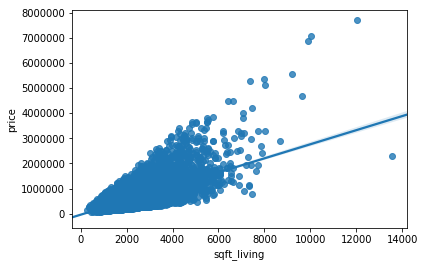

In [6]:
import seaborn as sns
sns.regplot(x='sqft_living',y='price',data=df)
%mathplotlib inline

this plot shows the correlation between price and sqrt_living is positive and strong and this feature can affect on predicting price

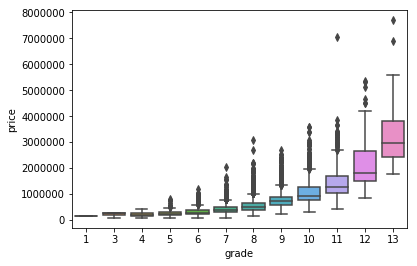

In [16]:
sns.boxplot(x='grade',y='price',data=df)

<h3><b>Model Development</b></h3>

<h4>Fit a linear regression model  to predict the 'price' using the list of features</h4>

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
x =df[['sqft_living', 'grade','sqft_above' ,'sqft_living15','bathrooms','bedrooms', 'view']]  
y=df['price']
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
lr.score(x,y)

0.5800613285560599

this R-squared means 58% of data can be fit with this model.
In other words 58% of data points are close to fitted regression line,but will be accurate this model on unseen data?

In [10]:
yhat=lr.predict(x)

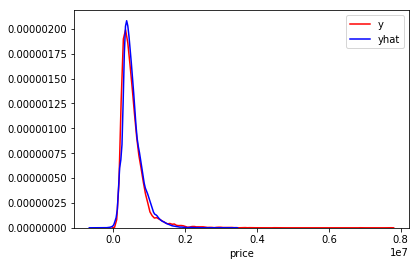

In [11]:
ax1=sns.distplot(y,hist=False,color='r',label='y')
sns.distplot(yhat,hist=False,color='b',label='yhat',ax=ax1)

<h4>Fit a linear regression with polynomial function</h4>

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:

x =df[['sqft_living', 'grade','sqft_above' ,'sqft_living15','bathrooms','bedrooms', 'view']]  
y=df['price']
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
lr_poly=LinearRegression()
lr_poly.fit(x_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
lr_poly.score(x_poly,y)

0.6495286119772365

In [15]:
yhat_poly=lr_poly.predict(x_poly)

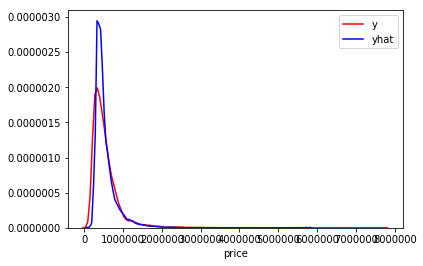

In [16]:
ax1=sns.distplot(y,hist=False,color='r',label='y')
sns.distplot(yhat_poly,hist=False,color='b',label='yhat',ax=ax1)

In [17]:
list_score=[]
order=[1,2,3,4,5,6,7,8]
lr_poly=LinearRegression()
for order in order:
    poly=PolynomialFeatures(degree=order)
    x_poly=poly.fit_transform(x)
    lr_poly.fit(x_poly,y)
    list_score.append(lr_poly.score(x_poly,y))

In [18]:
list_score


[0.5800613285560599,
 0.6495286119772365,
 0.6747669259233404,
 0.6941190768165586,
 0.7270238770931745,
 0.7189687505113709,
 0.7121365584425734,
 0.7042299004583792]

In [21]:

df1=pd.DataFrame(list_score,columns=['score'])

df1

,score
0,0.580061
1,0.649529
2,0.674767
3,0.694119
4,0.727024
5,0.718969
6,0.712137
7,0.704230


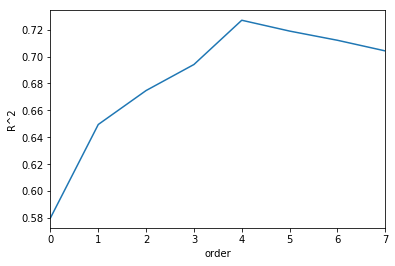

In [82]:
import matplotlib.pyplot as plt
df1.loc[:,'score'].plot(kind='line')

plt.xlabel('order')
plt.ylabel('R^2')
plt.show()


we see the best R-squared for model is belong to order=5 that it is 0.72

<h3><b>Evaluate Model</b></h3>

For evaluating model we divided data to two part:trainset and testset ,at first train the model with polynomial function on trainset and then test the model on testset

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x =df[['sqft_living', 'grade','sqft_above' ,'sqft_living15','bathrooms','bedrooms', 'view']]  
y =df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
poly=PolynomialFeatures(degree=5)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
lr=LinearRegression()
lr.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
lr.score(x_test_poly,y_test)

-104.2790816548422

This negative score means the model can be involve overfitting, we plot R-squared in different orders

In [32]:
list_score1=[]
order1=[1,2,3,4,5]
x =df[['sqft_living', 'grade','sqft_above' ,'sqft_living15','bathrooms','bedrooms', 'view']]  
y =df['price']
lr_poly=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
for order in order1:
    poly=PolynomialFeatures(degree=order)
    x_train_poly=poly.fit_transform(x_train)
    x_test_poly=poly.fit_transform(x_test)
    lr_poly.fit(x_train_poly,y_train)
    list_score1.append(lr_poly.score(x_test_poly,y_test))

In [33]:
 list_score1

[0.5864617929206212,
 0.6614364692208532,
 0.6408404107398747,
 0.14219689974362248,
 -104.2790816548422]

According  this R-squared from different order of polynomial function we see that the best score is for order=2 

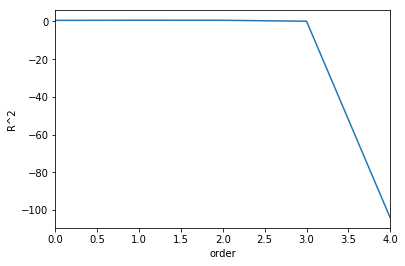

In [35]:
import matplotlib.pyplot as plt
df2=pd.DataFrame(list_score1,columns=['score'])
df2.loc[:,'score'].plot(kind='line')

plt.xlabel('order')
plt.ylabel('R^2')
plt.show()

<h4>Cross validation</h4>

In [48]:
from sklearn.model_selection import cross_val_score
x =df[['sqft_living', 'grade','sqft_above' ,'sqft_living15','bathrooms','bedrooms', 'view']]  
y =df['price']
scores=cross_val_score(lr,x,y,cv=3)

In [49]:
scores.mean()

0.5779600616794209

<h4>Ridge regression</h4>

we fit the model with Ridge regression and use hyperparameter for control magnetitude coefficients in polynomial function

In [52]:
from sklearn.linear_model import Ridge

In [53]:
x =df[['sqft_living', 'grade','sqft_above' ,'sqft_living15','bathrooms','bedrooms', 'view']]  
y =df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
Rg=Ridge(alpha=0.1)
Rg.fit(x_train_poly,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.27022e-20): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
Rg.score(x_test_poly,y_test)

0.6614364477436666

Now we try use GridSearchCV method for determine best alpha for ridge regression

In [58]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameters=[{'alpha':[0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]}]
grid=GridSearchCV(Rg,parameters,cv=4)
grid.fit(x_train_poly,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.33289e-22): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.06161e-22): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.48128e-22): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.58507e-22): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.33289e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
bestRg=grid.best_estimator_
bestRg


Ridge(alpha=100000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

we can see best hyperparameter for Ridge regression is 100000

In [84]:
grid.best_score_

0.6269956775557354

The best score with alpha = 100000 is 0.62

In [85]:
score=grid.cv_results_
score

{'mean_fit_time': array([0.00532377, 0.00478709, 0.00486255, 0.00466806, 0.00482965,
        0.00475317, 0.00448787, 0.00457263, 0.00448573, 0.00555384]),
 'std_fit_time': array([8.49290192e-04, 4.25784427e-04, 1.61219094e-04, 5.40286104e-05,
        6.03874774e-05, 6.50741609e-05, 7.45816798e-05, 8.39688776e-05,
        6.21400648e-05, 1.87187396e-03]),
 'mean_score_time': array([0.00079435, 0.00072032, 0.00077641, 0.0007422 , 0.0014016 ,
        0.00079572, 0.0006929 , 0.00068802, 0.00066978, 0.00068295]),
 'std_score_time': array([1.05304709e-04, 1.99428092e-05, 5.14576947e-05, 4.25351708e-05,
        1.07175166e-03, 6.14559441e-05, 4.12355168e-05, 3.15931045e-05,
        1.20788780e-05, 2.72374314e-05]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000,
                    1000000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'p

<h2>Conclusion</h2>


<p>After clean  and preprocessing data,with exploratory on data I found out features <b>'sqft_living', 'grade','sqft_above' 
    ,'sqft_living15','bathrooms','bedrooms'and 'view'</b> that have more correlate with price and I select them for model developing.
In model developing at first,I tried to develop a <b>multiple regression</b> on all data and got <b>R-squared equal 0.58</b> for model.Then I tried to develop a model with <b>polynomial function with different order from 1 to 8</b> and it was resulted best        <b>R-Squared equal 0.72 with order 5</b>.Then I tested this model on unseen data and got an overfitting with order 2, therefore best score for polynomial function was 0.66
 with order 2. then tried my model with <b>cross validation with 3 fold</b> and it was result <b>score equal 0.57</b>. then I developed a model
 with <b>Ridge regression with alpha equal 0.1 and got score 0.66</b> and I used <b>GridSearchCV</b> for determination best alpha for Ridge
regression and it was result <b>score 0.62 with alpha 100000</b>.</p>
